In [6]:
!pip install -U pandas==1.5.3 numpy==1.26.4 pandasai

  Using cached SQLAlchemy-2.0.35-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.6 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached langchain-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached pydantic_settings-2.6.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached aiohappyeyeballs-2.4.3-py3-none-any.whl.metadata (6.1 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl.metadata (4.0 kB)
  Using cached frozenlist-1.5.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (13 kB)
  Using cached multidict-6.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.0 kB)
  Using cached propcache-0.2.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached yarl-1.17.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (64 kB)
  Using cached marshmallow-3.23.1-py3-none-any.whl.metadata (7.5 kB)
  Using cached typing_inspect-0.9.0-p

In [1]:
import pandas as pd

data = pd.read_csv("data.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1310,1,1,"Name1310, Miss. Surname1310",female,NaN,0,0,SOTON/O2 3101272,76.760165,NaN,C
1,1311,0,3,"Name1311, Col. Surname1311",male,29.0,0,0,223596,10.193097,NaN,S
2,1312,0,3,"Name1312, Mr. Surname1312",male,20.0,0,0,54636,12.029416,C83,C
3,1313,0,3,"Name1313, Mr. Surname1313",male,27.0,0,0,PC 17760,13.429448,NaN,S
4,1314,0,3,"Name1314, Mr. Surname1314",male,32.0,0,0,364512,4.840769,E33,C
5,1315,1,3,"Name1315, Master. Surname1315",female,0.0,0,0,29750,14.805817,NaN,S
6,1316,0,1,"Name1316, Mr. Surname1316",male,NaN,0,0,C.A. 24579,115.806344,NaN,C
7,1317,1,2,"Name1317, Miss. Surname1317",female,28.0,0,1,113781,27.950048,NaN,S
8,1318,0,1,"Name1318, Mr. Surname1318",male,NaN,0,0,250652,29.467203,NaN,S
9,1319,0,2,"Name1319, Mr. Surname1319",male,32.0,0,0,17464,0.000000,NaN,S


In [18]:
from pandasai import SmartDataframe, SmartDatalake, Agent
from pandasai.llm.local_llm import LocalLLM

employees_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Emma', 'Liam', 'Olivia', 'William'],
    'Department': ['HR', 'Sales', 'IT', 'Marketing', 'Finance']
}

salaries_data = {
    'EmployeeID': [1, 2, 3, 4, 5],
    'Salary': [5000, 6000, 4500, 7000, 5500]
}

employees_df = pd.DataFrame(employees_data)
salaries_df = pd.DataFrame(salaries_data)

llm = LocalLLM(api_base="http://localhost:11434/v1", model="qwen2.5:latest")
# df = SmartDatalake([employees_df, salaries_df], config={"llm":llm})
df = SmartDataframe(df=data, config={"llm":llm})

In [21]:
df.chat("what is the counts of male and female?")

Result: {'type': 'plot', 'value': '/Users/pavanmantha/Pavans/Workshops/adv_genai_bootcamp/playgrounds/DataAnalysis_Agents/exports/charts/temp_chart.png'}


'/Users/pavanmantha/Pavans/Workshops/adv_genai_bootcamp/playgrounds/DataAnalysis_Agents/exports/charts/temp_chart.png'

In [23]:
agent = Agent(dfs=data, config={"llm":llm})
agent.chat("what are the counts of male and female?")

,Count
male,648840
female,351160


,Sex,Survived
0,female,260970
1,male,120711


<Figure size 800x600 with 0 Axes>

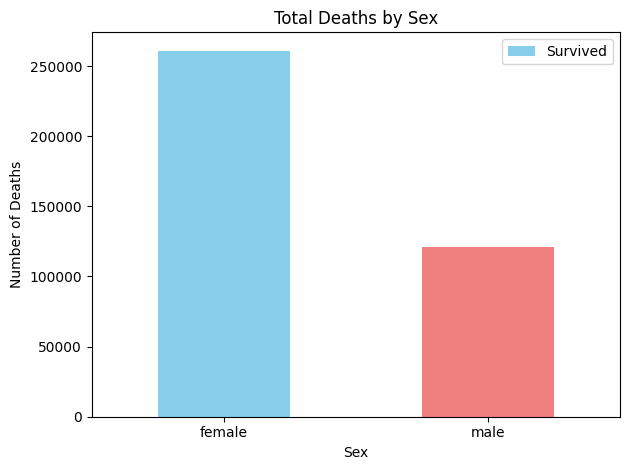

In [24]:
agent.chat("how many total deaths and also classify the deaths by sex")